# Моделирование нелинейных систем. ДЗ-3 Вынужденные колебания маятника с нелинейной силой (нелинейный резонанс). 

Выполнил: Давыдов Владислав Олегович

Преподаватель: Соловьев Виктор Роальдович

8 семестр, кафедра нанометрологии и наноматериалов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## $$ \ddot{\theta} + 2 \gamma \dot{\theta} + \omega_0^2 \theta = f_0 \cos{\omega t}  $$
## $$ \ddot{\theta} + 2 \gamma \dot{\theta} + \omega_c^2 (x) \theta = f_0 \cos{\omega t}  $$
## $$ \omega_c^2 (\theta) = \omega_0^2 (\dfrac{\sin(\theta)}{\theta}) \approx \omega_0^2 (1- \dfrac{\theta^2}{6}) $$

### Импортируем кое-что из прошлого дз

In [3]:
def f_acceleration(q, dot_q, gamma, step_time):
    ddot_q=-np.sin(q)-2*dot_q*gamma+np.cos(step_time)
    return ddot_q

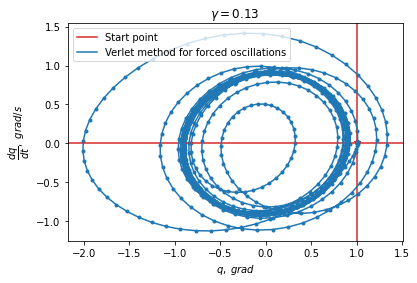

In [9]:
a3 = [1]
w3 = [0]
z = 0.13
wi=1
fig, ax = plt.subplots()

def Verlet(time, shagov, q_0, dot_q_0, z):
    q = q_0
    dot_q = dot_q_0
    h = time/shagov
    step_time = h
    
    #  Euler first step
    ddot_q = f_acceleration(q, dot_q, z, step_time)
    
    b = q
    q1 = q + h*dot_q + h**2/2 * ddot_q
    dot_q1 = (q1-b)/h
    a3.append(q1)
    w3.append(dot_q1)
    ax.plot(q1, dot_q1, '*', c='tab:red')
    
    
    '''
    q1 = q + h*dot_q + h**2/2 * ddot_q #0.79
    dot_q1 = dot_q + h * ddot_q #-0.42
    '''
    
    '''
    w3.append(dot_q1)
    b = q
    q1 = q + h*dot_q + h**2/2 * ddot_q
    dot_q1 = (q-b)/h
    a3.append(q1)
    ax.plot(a3, w3, '.', c='tab:blue')
    '''

    for i in range(shagov):
        step_time = step_time + h
        ddot_q1 = f_acceleration(q1, dot_q1, 0.13, step_time)
        b = q1
        q2 = 2*q1 - q + ddot_q1 * h**2/2
        q = q1
        q1 = q2
        dot_q1 = (q1 - b)/h
        a3.append(q1)
        w3.append(dot_q1)
        ax.plot(q1, dot_q1, '.', c='tab:blue')
        
    return q, dot_q, ddot_q


Verlet(300, 2000, 1, 0, z)
ax.axhline(w3[0], c='tab:red', label='Start point')
ax.axvline(a3[0], c ='tab:red')
ax.set_xlabel('$q, \; grad$')
ax.set_ylabel('$\dfrac{dq}{dt} , \; grad/s$')
ax.set_title('$\gamma = 0.13$')
ax.plot(a3, w3, '-', label='Verlet method for forced oscillations')
ax.legend()

In [19]:
z = 0.1
p = 2
ll = 1000
vg = 1
def unionpay_br(z, p, ll, time, shagov, vg):
    a3 = [1]
    w3 = [0]

    #fig, ax = plt.subplots()

    def Verlet(time, shagov, q_0, dot_q_0, z, vg):
        q = q_0
        dot_q = dot_q_0
        h = time/shagov
        step_time = h

        #  Euler first step
        ddot_q = v_acceleration(q, dot_q, z, step_time, p, wi, vg)

        b = q
        q1 = q + h*dot_q + h**2/2 * ddot_q
        dot_q1 = (q1-b)/h
        a3.append(q1)
        w3.append(dot_q1)
        ax.plot(q1, dot_q1, '*', c='tab:red')


        '''
        q1 = q + h*dot_q + h**2/2 * ddot_q #0.79
        dot_q1 = dot_q + h * ddot_q #-0.42
        '''

        '''
        w3.append(dot_q1)
        b = q
        q1 = q + h*dot_q + h**2/2 * ddot_q
        dot_q1 = (q-b)/h
        a3.append(q1)
        ax.plot(a3, w3, '.', c='tab:blue')
        '''

        for i in range(shagov):
            step_time = step_time + h
            ddot_q1 = v_acceleration(q1, dot_q1, z, step_time, p, wi, vg)
            b = q1
            q2 = 2*q1 - q + ddot_q1 * h**2/2
            q = q1
            q1 = q2
            dot_q1 = (q1 - b)/h
            a3.append(q1)
            w3.append(dot_q1)
            #ax.plot(q1, dot_q1, '.', c='tab:blue')

        return q, dot_q, ddot_q


    Verlet(time, shagov, 1, 0, z, vg)
    tff = np.linspace(0, time, shagov+2)
    #ax.axhline(w3[0], c='tab:red', label='Start point')
    #ax.axvline(a3[0], c ='tab:red')
    #ax.set_xlabel('$t, \; sec$')
    #ax.set_ylabel('$q , \; grad$')
    #ax.set_title('$\gamma = 0.01$, linear oscillations')
    #ax.plot(tff, a3, '-', label='Verlet method for forced oscillations')
    #ax.axvline(time-(time/shagov)*ll, c ='tab:red')
    #ax.legend()
    return np.max(a3[-ll:])

In [20]:
def v_acceleration(q, dot_q, gamma, step_time, p, wi, vg):
    ddot_q=-q*wi-2*dot_q*gamma+vg*np.cos(p*step_time)
    return ddot_q

In [30]:
unionpay_br(0.1, 2, 300, 800, 4000, 1)

0.14649659306351637